In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

In [22]:
train_values = pd.read_csv('data/training_set_values.csv')
train_labels = pd.read_csv('data/training_set_labels.csv')

In [23]:
df_train = train_values.merge(train_labels, on='id', how='inner')
df_train.shape

(59400, 41)

In [24]:
df_test = pd.read_csv('data/test_set_values.csv')
df_test.shape

(14850, 40)

In [25]:
df_train.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [26]:
#longtitude temporarily droped
#Temporarily keep subvillage, num_private date_recorded
df_train = df_train.drop(columns = ['lga','ward','region_code', 'district_code','wpt_name','longitude', 'latitude','scheme_name','extraction_type','extraction_type_group','management','payment','quality_group','quantity_group','source_type','source','waterpoint_type'])
df_test = df_test.drop(columns = ['lga','ward','region_code', 'district_code','wpt_name','longitude', 'latitude','scheme_name','extraction_type','extraction_type_group','management','payment','quality_group','quantity_group','source_type','source','waterpoint_type'])


In [27]:
df_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'num_private', 'basin', 'subvillage', 'region',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'water_quality', 'quantity',
       'source_class', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [50]:
df_train.shape

(59400, 24)

In [29]:
df_test.shape

(14850, 23)

In [30]:
df_train.apply(lambda x: sum(x.isnull()))

id                          0
amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
num_private                 0
basin                       0
subvillage                371
region                      0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_class       0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source_class                0
waterpoint_type_group       0
status_group                0
dtype: int64

### From here, if in test dataset, the value of variables below is not belong to any known class, then set it to 'unknown'

In [31]:
df_train['funder'] = df_train['funder'].fillna('unknown')
df_test['funder'] = df_test['funder'].fillna('unknown')

In [32]:
df_train['installer'] = df_train['installer'].fillna('unknown')
df_test['installer'] = df_test['installer'].fillna('unknown')

In [33]:
df_train['subvillage'] = df_train['subvillage'].fillna('unknown')
df_test['subvillage'] = df_test['subvillage'].fillna('unknown')

In [34]:
df_train['scheme_management'] = df_train['scheme_management'].fillna('unknown')
df_test['scheme_management'] = df_test['scheme_management'].fillna('unknown')

In [35]:
df_train['permit'] = df_train['permit'].fillna('unknown')
df_test['permit'] = df_test['permit'].fillna('unknown')

### convert 0 to nan

In [46]:
df_train['construction_year'] = df_train['construction_year'].replace( {0:np.nan})
df_test['construction_year'] = df_test['construction_year'].replace( {0:np.nan})

calculate existing year of each well

In [55]:
df_train['date_recorded'] = df_train['date_recorded'].map(lambda x: pd.to_datetime(x).year)-df_train['construction_year']
df_train.rename(columns = {'date_recorded':'existing year'}, inplace=True)
df_test['date_recorded'] = df_test['date_recorded'].map(lambda x: pd.to_datetime(x).year)-df_test['construction_year']
df_test.rename(columns = {'date_recorded':'existing year'}, inplace=True)

In [57]:
df_train['existing year'].head(5)

0    12.0
1     3.0
2     4.0
3    27.0
4     NaN
Name: existing year, dtype: float64

In [58]:
df_train['existing year'] = df_train['existing year'].fillna('unknown')
df_test['existing year'] = df_test['existing year'].fillna('unknown')

### drop construction_year

In [60]:
df_train = df_train.drop(columns = ['construction_year'])
df_test = df_test.drop(columns = ['construction_year'])

In [61]:
df_train.shape

(59400, 23)

In [62]:
df_test.shape

(14850, 22)

In [63]:
df_train.apply(lambda x: sum(x.isnull()))

id                          0
amount_tsh                  0
existing year               0
funder                      0
gps_height                  0
installer                   0
num_private                 0
basin                       0
subvillage                  0
region                      0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management           0
permit                      0
extraction_type_class       0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source_class                0
waterpoint_type_group       0
status_group                0
dtype: int64

In [66]:
df_train['quantity'][:10]

0          enough
1    insufficient
2          enough
3             dry
4        seasonal
5          enough
6          enough
7          enough
8        seasonal
9          enough
Name: quantity, dtype: object

### test the relationship between 'quantity' and 'amount_tsh' and to see whether the 'amount_tsh' is decided by 'quantity' in some extent

In [73]:
df_train['amount_tsh'].value_counts()

0.00         41639
500.00        3102
50.00         2472
1000.00       1488
20.00         1463
200.00        1220
100.00         816
10.00          806
30.00          743
2000.00        704
250.00         569
300.00         557
5000.00        450
5.00           376
25.00          356
3000.00        334
1200.00        267
1500.00        197
6.00           190
600.00         176
4000.00        156
2400.00        145
2500.00        139
6000.00        125
7.00            69
8000.00         61
750.00          59
40.00           59
10000.00        57
12000.00        51
             ...  
16000.00         2
16300.00         2
800.00           2
11000.00         2
590.00           2
520.00           2
26000.00         2
13000.00         2
9.00             1
170000.00        1
200000.00        1
900.00           1
0.25             1
53.00            1
350000.00        1
306.00           1
120000.00        1
26.00            1
59.00            1
60000.00         1
5400.00          1
70000.00    

In [74]:
df_train['amount_tsh'].describe()
#so 'amount_tsh' is mainly below 20

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [72]:
df_train['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [89]:
df_train[df_train['amount_tsh']==0]['quantity'].value_counts(normalize=True)

enough          0.506809
insufficient    0.262110
dry             0.132472
seasonal        0.081918
unknown         0.016691
Name: quantity, dtype: float64

In [98]:
df_train[(df_train['amount_tsh']<=20) & (df_train['amount_tsh']>0)]['quantity'].value_counts(normalize=True)

enough          0.646379
insufficient    0.272016
seasonal        0.048963
dry             0.027542
unknown         0.005100
Name: quantity, dtype: float64

In [83]:
df_train[df_train['amount_tsh']>20]['quantity'].value_counts(normalize=True)

enough          0.687045
insufficient    0.230432
dry             0.043792
seasonal        0.033401
unknown         0.005331
Name: quantity, dtype: float64

### according to above, 'amount_tsh'>20 is in the similar percentage with 0<'amount_tsh'<=20(and there is a question that what df_train['amount_tsh']==0 describe, need to consider, and then to think about the figure below,why it is skew)

Text(0.5, 1.0, 'Amount of water available')

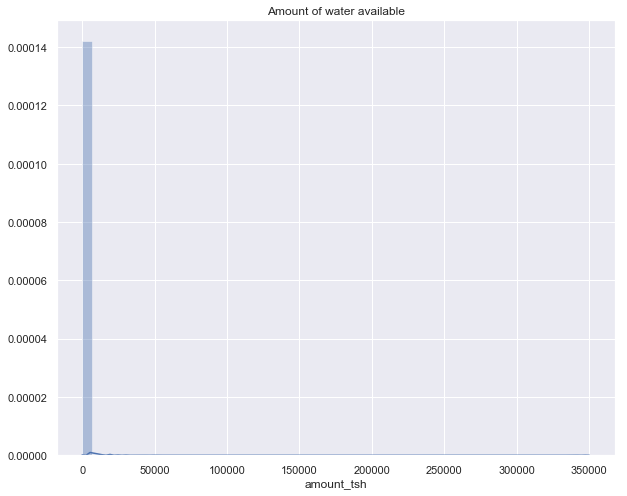

In [68]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.distplot(df_train['amount_tsh'])
# ax2 = ax.twinx()
# sns.distplot(df_train['quantity'],ax=ax2)
ax.set_title('Amount of water available')

# ax = df.plot(x="date", y="column1", legend=False)
# ax2 = ax.twinx()
# df.plot(x="date", y="column2", ax=ax2, legend=False, color="r")
# ax.figure.legend()
# plt.show()

Text(0.5, 1.0, 'Distribution of population')

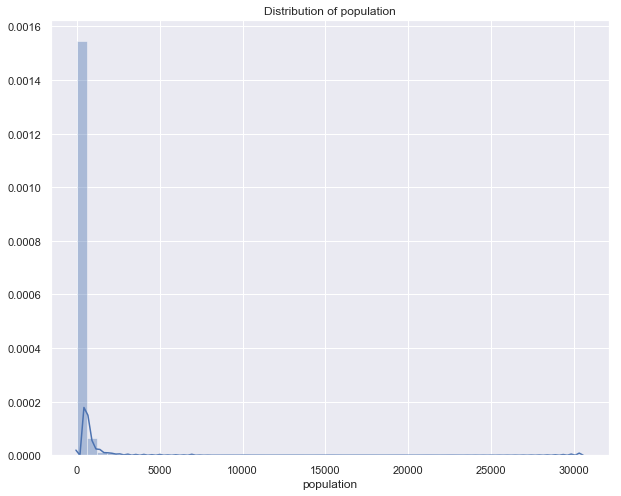

In [114]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.distplot(df_train['population'])
ax.set_title('Distribution of population')# skewness may be caused by zero,try next

In [115]:
df_train['population'] = df_train['population'].replace( {0:np.nan})#population cannot be 0 so it might be missing value

In [117]:
df_train['population'].value_counts()

1.0       7025
200.0     1940
150.0     1892
250.0     1681
300.0     1476
100.0     1146
50.0      1139
500.0     1009
350.0      986
120.0      916
400.0      775
60.0       706
30.0       626
40.0       552
80.0       533
450.0      499
20.0       462
600.0      438
230.0      388
75.0       289
1000.0     278
800.0      269
90.0       265
130.0      264
25.0       255
320.0      249
35.0       245
360.0      222
140.0      215
210.0      209
          ... 
424.0        1
1354.0       1
561.0        1
571.0        1
141.0        1
1114.0       1
2670.0       1
788.0        1
722.0        1
687.0        1
759.0        1
731.0        1
3450.0       1
2248.0       1
2683.0       1
2685.0       1
171.0        1
2430.0       1
2992.0       1
789.0        1
3455.0       1
3072.0       1
2020.0       1
966.0        1
1203.0       1
491.0        1
807.0        1
948.0        1
1410.0       1
419.0        1
Name: population, Length: 1048, dtype: int64

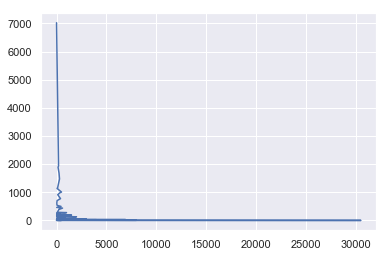

In [116]:
plt.plot(df_train['population'].value_counts())#still skew (need some other methods) also means '0' perhaps not mean NaN

In [118]:
df_train['population'] = df_train['population'].replace( {np.nan:np.zeros})
df_test['population'] = df_test['population'].replace( {np.nan:np.zeros})

In [120]:
df_train.apply(lambda x: sum(x.isnull()))


id                          0
amount_tsh                  0
existing year               0
funder                      0
gps_height                  0
installer                   0
num_private                 0
basin                       0
subvillage                  0
region                      0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management           0
permit                      0
extraction_type_class       0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source_class                0
waterpoint_type_group       0
status_group                0
dtype: int64

In [121]:
df_test.apply(lambda x: sum(x.isnull()))

id                         0
amount_tsh                 0
existing year              0
funder                     0
gps_height                 0
installer                  0
num_private                0
basin                      0
subvillage                 0
region                     0
population                 0
public_meeting           821
recorded_by                0
scheme_management          0
permit                     0
extraction_type_class      0
management_group           0
payment_type               0
water_quality              0
quantity                   0
source_class               0
waterpoint_type_group      0
dtype: int64

### have no idea what 'public meeting' is

In [123]:
df_train['public_meeting'] = df_train['public_meeting'].fillna('unknown')
df_test['public_meeting'] = df_test['public_meeting'].fillna('unknown')

In [124]:
df_train.to_csv('data/trainset_clean1.csv', index=False)
df_test.to_csv('data/trainset_clean1.csv', index=False)